In [1]:
#imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loaded dataset
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
irisdf = pd.DataFrame(iris.data, columns = iris.feature_names)
irisdf["target"] = iris.target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
irisdf.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
irisdf["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

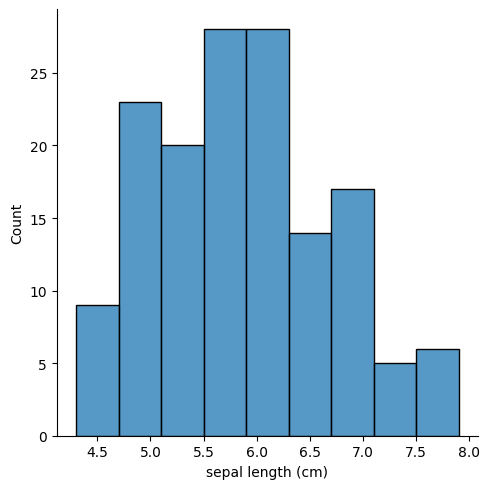

In [7]:
sns.displot(data = irisdf, x = "sepal length (cm)")

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

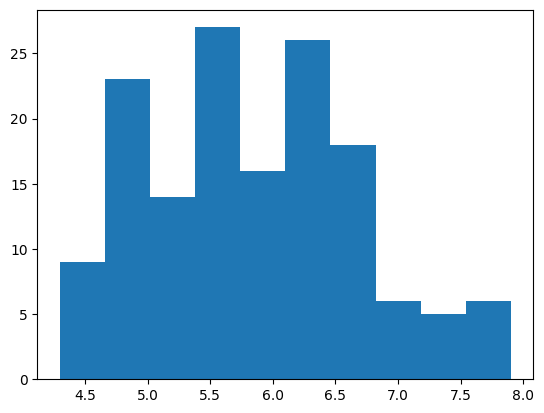

In [8]:
plt.hist(data = irisdf, x = "sepal length (cm)")

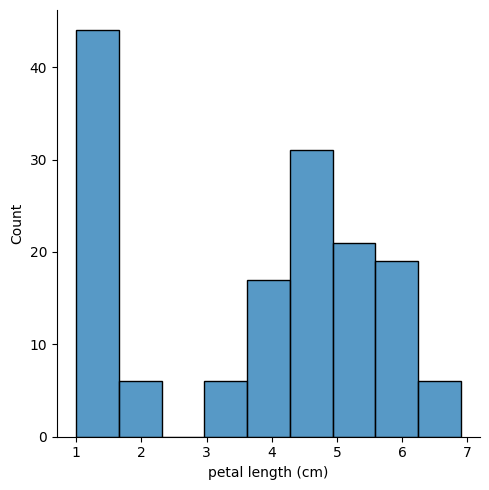

In [9]:
sns.displot(data = irisdf, x = "petal length (cm)")

<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

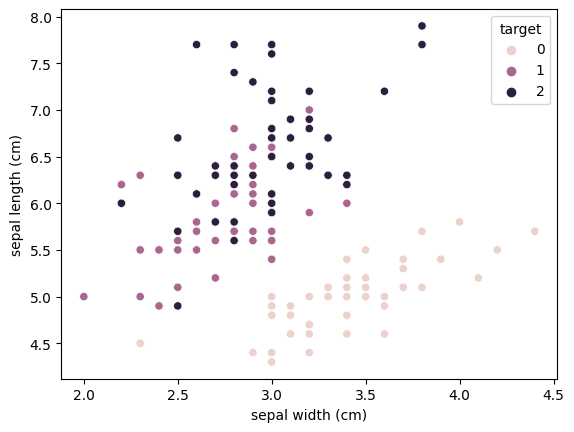

In [10]:
sns.scatterplot(data = irisdf, x = "sepal width (cm)", y= "sepal length (cm)", hue = "target")

<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

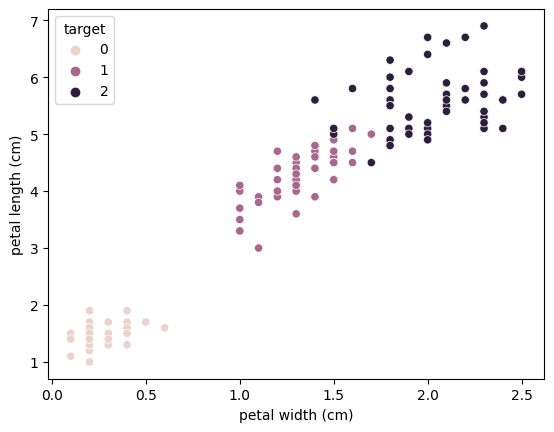

In [11]:
sns.scatterplot(data = irisdf, x = "petal width (cm)", y= "petal length (cm)", hue = "target")

In [12]:
y = irisdf["target"]
X = irisdf.drop("target", axis = 1)

In [13]:
#stratified train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32, stratify = irisdf["target"])

In [14]:
#imported SVM from sklearn
from sklearn.svm import SVC
svmodel = SVC(C = 3, gamma ="scale", kernel = "rbf")
svmodel.fit(X_train , y_train)

SVC(C=3)

In [15]:
y_pred_train = svmodel.predict(X_train)
y_pred_test = svmodel.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("train_acc:", accuracy_score(y_train, y_pred_train))
print("test_acc:", accuracy_score(y_test, y_pred_test))


      

train_acc: 0.9833333333333333
test_acc: 0.9666666666666667


In [17]:
print("train_acc:\n", classification_report(y_train, y_pred_train))
print("test_acc:\n", classification_report(y_test, y_pred_test))

train_acc:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.95      0.97        40
           2       0.95      1.00      0.98        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

test_acc:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
# print(confusion_matrix(y_train, y_pred_train))